# Analyse du dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("dataset.csv").drop(columns = "Unnamed: 0")

In [3]:
df['tour'] = df['tour'].astype('str')
df['année'] = df['année'].astype('str')

In [4]:
df["Participation"] = (df["Exprimés"]/df['Inscrits'])*100

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bureau de vote    1772 non-null   object 
 1   Quartier          1772 non-null   object 
 2   Quartiers Mairie  1772 non-null   object 
 3   Inscrits          1772 non-null   float64
 4   Abstentions       1772 non-null   float64
 5   Votants           1772 non-null   float64
 6   Exprimés          1772 non-null   float64
 7   ED                1512 non-null   float64
 8   DROITE            1772 non-null   float64
 9   GAUCHE            1772 non-null   float64
 10  EG                1309 non-null   float64
 11  DIVERS            1268 non-null   float64
 12  election          1772 non-null   object 
 13  année             1772 non-null   object 
 14  tour              1772 non-null   object 
 15  Participation     1772 non-null   float64
dtypes: float64(10), object(6)
memory usage: 22

## Participation

Par exemple pour les municipales, le quartier les Minimes.

In [6]:
df_participation = df.loc[(df['Quartier'] == "Minimes") & (df['election'] == 'leg') & (df['année'] == '22')]

<Axes: xlabel='tour', ylabel='Participation'>

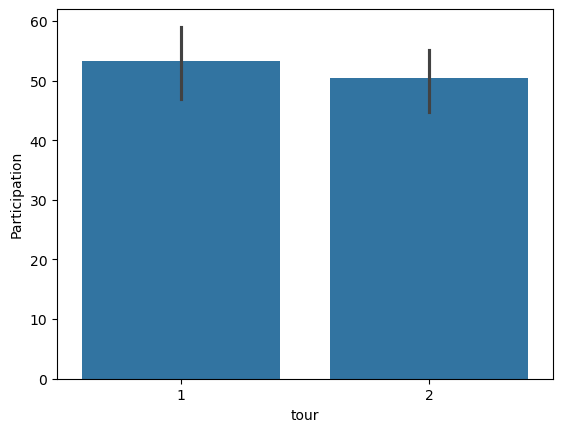

In [7]:
sns.barplot(data = df_participation, x = 'tour', y ='Participation')

In [8]:
df_participation

,Bureau de vote,Quartier,Quartiers Mairie,Inscrits,Abstentions,Votants,Exprimés,ED,DROITE,GAUCHE,EG,DIVERS,election,année,tour,Participation
161,157,Minimes,8,1062.0,409.0,653.0,644.0,59.0,218.0,338.0,6.0,23.0,leg,22,1,60.640301
162,158,Minimes,8,1040.0,520.0,520.0,510.0,67.0,165.0,253.0,6.0,19.0,leg,22,1,49.038462
163,159,Minimes,8,1129.0,427.0,702.0,697.0,51.0,245.0,377.0,1.0,23.0,leg,22,1,61.736050
164,160,Minimes,8,1051.0,432.0,619.0,606.0,79.0,178.0,318.0,4.0,27.0,leg,22,1,57.659372
165,161,Minimes,8,736.0,307.0,429.0,425.0,37.0,131.0,236.0,0.0,21.0,leg,22,1,57.744565
166,162,Minimes,8,1045.0,511.0,534.0,524.0,49.0,151.0,309.0,2.0,13.0,leg,22,1,50.143541
167,163,Minimes,8,690.0,435.0,255.0,249.0,30.0,65.0,142.0,1.0,11.0,leg,22,1,36.086957
421,157,Minimes,8,1062.0,434.0,628.0,603.0,NaN,272.0,331.0,NaN,NaN,leg,22,2,56.779661
422,158,Minimes,8,1040.0,539.0,501.0,476.0,NaN,199.0,277.0,NaN,NaN,leg,22,2,45.769231
423,159,Minimes,8,1129.0,451.0,678.0,648.0,NaN,284.0,364.0,NaN,NaN,leg,22,2,57.395926


In [9]:
df_participation_agg = df_participation.groupby(['Quartier', 'tour'], as_index=False)['Participation'].mean().round(1)

In [10]:
fig = px.bar(df_participation, 
             x='tour',           # Axe des x : les tours de l'élection (1er ou 2e Tour)
             y='Participation',  # Axe des y : la participation (en pourcentage)
             title='Taux de participation électorale par tour (Minimes)',  # Titre
             color='tour',       # Colorer les barres en fonction du tour
             text_auto=True) 
fig.show()

In [11]:
df_participation_2 = df.loc[(df['Quartier'] == "Minimes") & ((df['election'] == 'mun') | ((df["election"] == "leg") & (df["année"] == 22)))]

In [12]:
df_participation_2 = df_participation_2.groupby(['Quartier', 'tour'], as_index=False)['Participation'].mean().round(1)

In [13]:
df_participation_2

,Quartier,tour,Participation
0,Minimes,1,36.5


In [14]:
fig = px.bar(df_participation_2,
             x="election",
             y='Participation',
             title="Participation électorale par tour (Minimes)",
             color='tour',
             barmode = 'group',
             text_auto=True)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Quartier', 'tour', 'Participation'] but received: election